In [76]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import pandas as pd

#MAKE SURE ALL MASS VALUES ARE POSITIVE!!!

In [77]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

### Reading in files:

In [4]:
Kep_ID, sep, gkclr, prot = np.loadtxt ('Janes2017_data.txt', usecols=(1,6,9,10), unpack=True)

In [23]:
row, Lfl_Lbol, jim_dist, giclr, kicnum, mass, tau = np.genfromtxt('kic_lflare_mass_dist.csv', usecols = (0,1,8,9,10,11,12), delimiter = ',', unpack = True, skip_header=True)

w=np.where((Lfl_Lbol < 1e-15))
Lfl_Lbol[w]=1e-15

In [6]:
#Check for negative mass values

print(len(mass))

for i in range(len(mass)):
    if mass[i] <= 0:
        np.delete(mass,[i])
        
print(len(mass))

202359
202359


In [7]:
sep

array([   9.3,    9.3,   29. ,   29. ,   21.8,   21.8,  409.9,  409.9,
         11.6,   11.6,   19.1,   19.1,   24.7,   24.7,   12.9,   12.9,
         18.9,   18.9,  291.8,  291.8,   34.6,   34.6,   36.4,   36.4,
         53. ,   53. ,   30.4,   30.4,  576.9,  576.9,   30.7,   30.7,
        102.9,  102.9,   13.4,   13.4,  124.9,  124.9,   48.4,   48.4,
         16.7,   16.7,   41.6,   41.6,   38. ,   38. ,   28.3,   28.3,
        173.9,  173.9,   98.2,   98.2,  201.6,  201.6,   20.9,   20.9,
         25.4,   25.4,   13.4,   13.4,    6.1,    6.1,   25.2,   25.2,
         19.7,   19.7,   26.6,   26.6,   46.1,   46.1,   15. ,   15. ,
         17.6,   17.6,   71.5,   71.5,   59.3,   59.3,   31.9,   31.9,
         64.3,   64.3,    8.5,    8.5,   66.8,   66.8,   61.1,   61.1,
         60.2,   60.2,   36.9,   36.9,   27. ,   27. ,   25.7,   25.7,
         36.8,   36.8,   12.6,   12.6,    8.2,    8.2,   49.3,   49.3,
          6.4,    6.4,   17. ,   17. ,   17.6,   17.6,   19.2,   19.2,
      

### Crossmatching data sets:

In [8]:
m = np.array(np.zeros(len(Kep_ID)), dtype='int')


for k in range (len(Kep_ID)):
    
    if k==72:
        pass
    
    elif k==114:
        pass
    
    else:
        x = np.where(Kep_ID[k] == kicnum)
        #print(x,k)
    
        m[k] = x[0]
    
    
print(m,len(m)) 
# in database speak, this a Join (Inner Join)



[129756 129757 141257 141258 139652 139654 150200 153960 129850 129851
 105999 106001 129881 129882   7499   7500 146653 146654  28638  28642
  25352  25354 182991 182992  10631  10632  13457  13459 178808 180295
 178808 178809 128357 128358  24209  24210 160630 160632  36334  36335
 187743 187744  77349  77351  26608  26609  85433  85434  36391  36396
  41212  42005  70807  72227 121909 121910 189518 189520 158737 158738
 136808 136809 195354 195355 140185 140186 116783 116785 200940 200942
  38466  38467      0  10912  49778  49780  13801  13803  34427  34428
 158854 158857  38560  38561 141965 141967  50202  50204 147144 147149
  29077  29079  41384  41385  82186  82188 143796 143797  54595  54596
  69721  69723 130656 130660 152836 152837  58177  58178 135482 135483
   8188   8189  13985  13986      0 173725 186531 186536  84362  84364
 166314 166315 199794 199796 157152 157153  47336  47337  45053  45054
  34865  34866  90381  90382  41730  42578  15706  15708  75908  77145
  4754

In [9]:
m = np.delete(m,[72,114])#Deletes zeros in m - ONLY RUN ONCE!!!
print(len(m),m)

184 [129756 129757 141257 141258 139652 139654 150200 153960 129850 129851
 105999 106001 129881 129882   7499   7500 146653 146654  28638  28642
  25352  25354 182991 182992  10631  10632  13457  13459 178808 180295
 178808 178809 128357 128358  24209  24210 160630 160632  36334  36335
 187743 187744  77349  77351  26608  26609  85433  85434  36391  36396
  41212  42005  70807  72227 121909 121910 189518 189520 158737 158738
 136808 136809 195354 195355 140185 140186 116783 116785 200940 200942
  38466  38467  10912  49778  49780  13801  13803  34427  34428 158854
 158857  38560  38561 141965 141967  50202  50204 147144 147149  29077
  29079  41384  41385  82186  82188 143796 143797  54595  54596  69721
  69723 130656 130660 152836 152837  58177  58178 135482 135483   8188
   8189  13985  13986 173725 186531 186536  84362  84364 166314 166315
 199794 199796 157152 157153  47336  47337  45053  45054  34865  34866
  90381  90382  41730  42578  15706  15708  75908  77145  47540  48696
  

### Sorting primary & secondary components:

In [10]:
a = np.arange(0,184,2) #high mass components 
b = np.arange(1,184,2) #low mass components

for j in range(0,len(a)):
    if mass[m][a[j]] < mass[m][b[j]]:
        tmp = a[j]
        a[j] = b[j]
        b[j] = tmp

In [11]:
### Good_either index contains FFLs above minimum detection threshold ###

Good_either = np.where(((Lfl_Lbol[m][a] > 1e-7) | (Lfl_Lbol[m][b] > 1e-7)) & 
                        ((Lfl_Lbol[m][a] > 1e-15) & (Lfl_Lbol[m][b] > 1e-15)))
                        
print(len(m),len(a),np.size(Good_either))

184 92 58


# Figures: 

### Activity Comparison - 

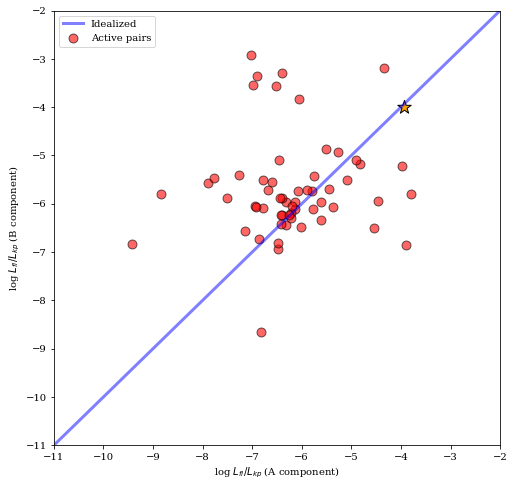

In [36]:
plt.figure(figsize=(8,8)) 
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either]), np.log10(Lfl_Lbol[m][b][Good_either]), 
            alpha = 0.6, s=80, c='r', edgecolor='k', label='Active pairs')

#plt.scatter(np.log10(Lfl_Lbol[m][a]+1e-10), np.log10(Lfl_Lbol[m][b]+1e-10), s=5, c='k', alpha=0.2, 
            #label='Kepler wide binary pairs')


plt.plot([-11,-2], [-11,-2],'b', lw=3, alpha=0.5,label='Idealized')
#plt.plot([-11,-2], [-12,-3],'y', lw=3, alpha=0.5,label='Within solar variability')
#plt.plot([-11,-2], [-10,-1],'y', lw=3, alpha=0.5)

plt.scatter(-3.93,-4.00, marker='*', color='orange',  edgecolor='k', s=200)

#box1 = plt.Polygon([[-5,-4],[-11,-4],[-11,-2],[-3,-2]],fc='g',alpha=0.2,label='Active Secondary')
#box2 = plt.Polygon([[-4,-5],[-4,-11],[-2,-11],[-2,-3]],fc='b',alpha=0.2,label='Active Primary')
#circle = plt.Circle((-11, -11), radius=5, fc='r',alpha=0.2,label='Below noise threshold')
#plt.gca().add_patch(circle)
#plt.gca().add_patch(box1)
#plt.gca().add_patch(box2)

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')
plt.legend(fontsize=10, loc=2)
plt.savefig('AB_v1.png',dpi=500)

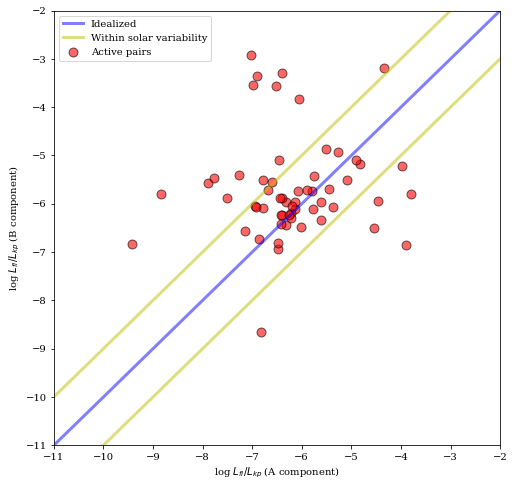

In [37]:
plt.figure(figsize=(8,8)) ###Make demographic boxes, propagate into figs 2 and 3, make hists of delta(g-i) for each pop###

# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either]), np.log10(Lfl_Lbol[m][b][Good_either]), 
            alpha = 0.6, s=80, c='r', edgecolor='k', label='Active pairs')

#plt.scatter(np.log10(Lfl_Lbol[m][a]+1e-10), np.log10(Lfl_Lbol[m][b]+1e-10), s=5, c='k', alpha=0.2, 
            #label='Kepler wide binary pairs')


plt.plot([-11,-2], [-11,-2],'b', lw=3, alpha=0.5,label='Idealized')
plt.plot([-11,-2], [-12,-3],'y', lw=3, alpha=0.5,label='Within solar variability')
plt.plot([-11,-2], [-10,-1],'y', lw=3, alpha=0.5)

#box1 = plt.Polygon([[-5,-4],[-11,-4],[-11,-2],[-3,-2]],fc='g',alpha=0.2,label='Active Secondary')
#box2 = plt.Polygon([[-4,-5],[-4,-11],[-2,-11],[-2,-3]],fc='b',alpha=0.2,label='Active Primary')
#circle = plt.Circle((-11, -11), radius=5, fc='r',alpha=0.2,label='Below noise threshold')
#plt.gca().add_patch(circle)
#plt.gca().add_patch(box1)
#plt.gca().add_patch(box2)

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')
plt.legend(fontsize=10, loc=2)
plt.savefig('AB_v2.png',dpi=500)

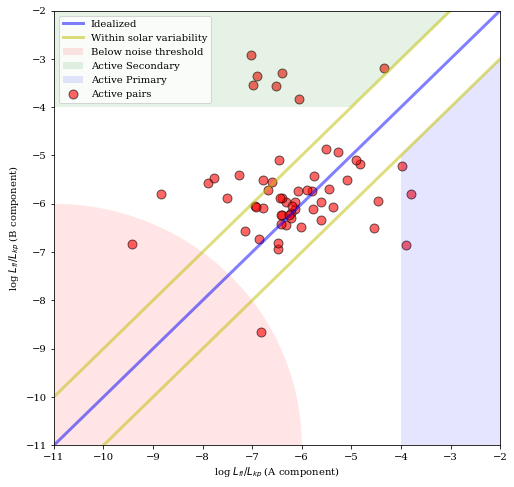

In [38]:
plt.figure(figsize=(8,8)) ###Make demographic boxes, propagate into figs 2 and 3, make hists of delta(g-i) for each pop###

# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either]), np.log10(Lfl_Lbol[m][b][Good_either]), 
            alpha = 0.6, s=80, c='r', edgecolor = 'k', label='Active pairs')

#plt.scatter(np.log10(Lfl_Lbol[m][a]+1e-10), np.log10(Lfl_Lbol[m][b]+1e-10), s=5, c='k', alpha=0.2, 
            #label='Kepler wide binary pairs')


plt.plot([-11,-2], [-11,-2],'b', lw=3, alpha=0.5,label='Idealized')
plt.plot([-11,-2], [-12,-3],'y', lw=3, alpha=0.5,label='Within solar variability')
plt.plot([-11,-2], [-10,-1],'y', lw=3, alpha=0.5)

box1 = plt.Polygon([[-5,-4],[-11,-4],[-11,-2],[-3,-2]],fc='g',alpha=0.1,label='Active Secondary')
box2 = plt.Polygon([[-4,-5],[-4,-11],[-2,-11],[-2,-3]],fc='b',alpha=0.1,label='Active Primary')
circle = plt.Circle((-11, -11), radius=5, fc='r',alpha=0.1,label='Below noise threshold')
plt.gca().add_patch(circle)
plt.gca().add_patch(box1)
plt.gca().add_patch(box2)

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')
plt.legend(fontsize=10, loc=2)
plt.savefig('AB_v3.png',dpi=500)

In [13]:
gbox = np.where((Lfl_Lbol[m][b][Good_either] > 1e-4) & (Lfl_Lbol[m][a][Good_either] < 1e-4))
bbox = np.where((Lfl_Lbol[m][b][Good_either] < 1e-4) & (Lfl_Lbol[m][a][Good_either] > 1e-4))
ybox = np.where(((np.log10(Lfl_Lbol[m][b][Good_either]) - np.log10(Lfl_Lbol[m][a][Good_either])) < 1) & 
                ((np.log10(Lfl_Lbol[m][b][Good_either]) - np.log10(Lfl_Lbol[m][a][Good_either])) > -1))
print(ybox)

(array([ 1,  2,  3,  4,  5,  6,  8,  9, 11, 13, 14, 15, 16, 18, 22, 23, 25,
       29, 32, 34, 35, 36, 37, 38, 39, 40, 42, 44, 47, 48, 50, 51, 52, 55,
       56, 57]),)


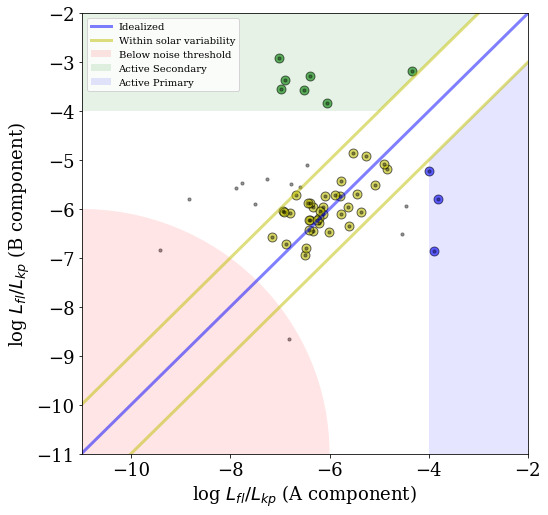

In [45]:
### Final form ###

plt.figure(figsize=(8,8.1)) 

# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either][gbox]), np.log10(Lfl_Lbol[m][b][Good_either][gbox]), 
            alpha = 0.6, s=80, c='g', edgecolor='k')

plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either][bbox]), np.log10(Lfl_Lbol[m][b][Good_either][bbox]), 
            alpha = 0.6, s=80, c='b', edgecolor='k')

plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either][ybox]), np.log10(Lfl_Lbol[m][b][Good_either][ybox]), 
            alpha = 0.6, s=80, c='y', edgecolor='k')

plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either]), np.log10(Lfl_Lbol[m][b][Good_either]), s=10, c='k', alpha=0.4)


plt.plot([-11,-2], [-11,-2],'b', lw=3, alpha=0.5,label='Idealized')
plt.plot([-11,-2], [-12,-3],'y', lw=3, alpha=0.5,label='Within solar variability')
plt.plot([-11,-2], [-10,-1],'y', lw=3, alpha=0.5)

box1 = plt.Polygon([[-5,-4],[-11,-4],[-11,-2],[-3,-2]],fc='g',alpha=0.1,label='Active Secondary')
box2 = plt.Polygon([[-4,-5],[-4,-11],[-2,-11],[-2,-3]],fc='b',alpha=0.1,label='Active Primary')
circle = plt.Circle((-11, -11), radius=5, fc='r',alpha=0.1,label='Below noise threshold')
plt.gca().add_patch(circle)
plt.gca().add_patch(box1)
plt.gca().add_patch(box2)

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')
plt.legend(fontsize=10, loc=2)
plt.savefig('AB_v4.png',dpi=600)

In [127]:
ABfile = 'ABtracks.npz'
npz = np.load(ABfile)

In [128]:
Lfl_Lkp_wb = npz['ABarray']
mass_wb = npz['mass']
age_wb = npz['age']

In [152]:
mass_wb

array([ 0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,
        0.7 ,  0.75,  0.8 ,  0.85])

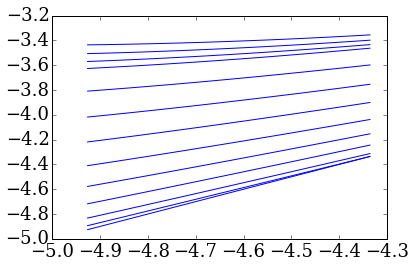

In [151]:
for k in range (mass_wb.size):
    plt.plot(Lfl_Lkp_wb[-1,:],Lfl_Lkp_wb[k,:],color='b')

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


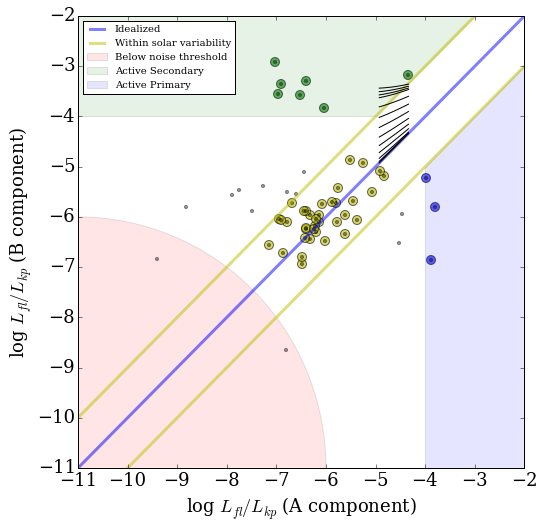

In [140]:
plt.figure(figsize=(8,8.1)) 

# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either][gbox]), np.log10(Lfl_Lbol[m][b][Good_either][gbox]), 
            alpha = 0.6, s=80, c='g', edgecolor='k')

plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either][bbox]), np.log10(Lfl_Lbol[m][b][Good_either][bbox]), 
            alpha = 0.6, s=80, c='b', edgecolor='k')

plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either][ybox]), np.log10(Lfl_Lbol[m][b][Good_either][ybox]), 
            alpha = 0.6, s=80, c='y', edgecolor='k')

plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either]), np.log10(Lfl_Lbol[m][b][Good_either]), s=10, c='k', alpha=0.4)


plt.plot([-11,-2], [-11,-2],'b', lw=3, alpha=0.5,label='Idealized')
plt.plot([-11,-2], [-12,-3],'y', lw=3, alpha=0.5,label='Within solar variability')
plt.plot([-11,-2], [-10,-1],'y', lw=3, alpha=0.5)

box1 = plt.Polygon([[-5,-4],[-11,-4],[-11,-2],[-3,-2]],fc='g',alpha=0.1,label='Active Secondary')
box2 = plt.Polygon([[-4,-5],[-4,-11],[-2,-11],[-2,-3]],fc='b',alpha=0.1,label='Active Primary')
circle = plt.Circle((-11, -11), radius=5, fc='r',alpha=0.1,label='Below noise threshold')
plt.gca().add_patch(circle)
plt.gca().add_patch(box1)
plt.gca().add_patch(box2)


for k in range (mass_wb.size):
    plt.plot(Lfl_Lkp_wb[-1,:],Lfl_Lkp_wb[k,:],color='k')

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')
plt.legend(fontsize=10, loc=2)
plt.savefig('AB_v4.png',dpi=600)

## Mass analysis - 

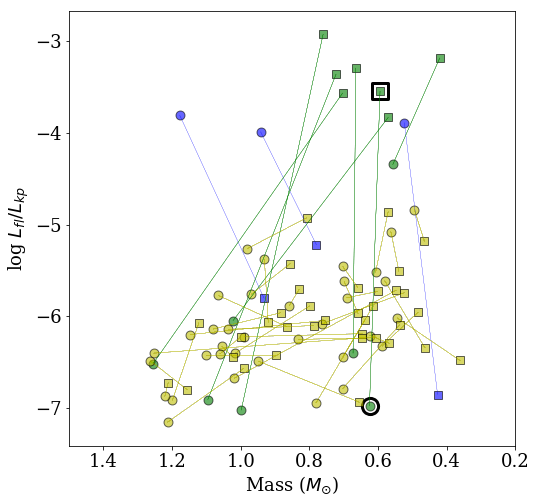

In [49]:
### Mass vs. Activity ###

plt.figure(figsize=(8,8))

plt.scatter(mass[m][a][Good_either][gbox][0],np.log10(Lfl_Lbol[m][a][Good_either][gbox][0]),s=260,c='white',edgecolor='k',lw=3)
plt.scatter(mass[m][b][Good_either][gbox][0],np.log10(Lfl_Lbol[m][b][Good_either][gbox][0]),s=260,c='white',edgecolor='k',lw=3,marker='s')

plt.scatter(mass[m][a][Good_either][bbox],np.log10(Lfl_Lbol[m][a][Good_either][bbox]),alpha = 0.6,s=80,c='b',edgecolor='k')
plt.scatter(mass[m][a][Good_either][gbox],np.log10(Lfl_Lbol[m][a][Good_either][gbox]),alpha = 0.6,s=80,c='g',edgecolor='k')
plt.scatter(mass[m][a][Good_either][ybox],np.log10(Lfl_Lbol[m][a][Good_either][ybox]),alpha = 0.6,s=80,c='y',edgecolor='k')
plt.scatter(mass[m][b][Good_either][bbox],np.log10(Lfl_Lbol[m][b][Good_either][bbox]),alpha = 0.6,s=80,c='b',edgecolor='k',marker='s')
plt.scatter(mass[m][b][Good_either][gbox],np.log10(Lfl_Lbol[m][b][Good_either][gbox]),alpha = 0.6,s=80,c='g',edgecolor='k',marker='s')
plt.scatter(mass[m][b][Good_either][ybox],np.log10(Lfl_Lbol[m][b][Good_either][ybox]),alpha = 0.6,s=80,c='y',edgecolor='k',marker='s')


for k in range (len(bbox[0])):
    plt.plot([mass[m][a][Good_either][bbox],mass[m][b][Good_either][bbox]],[np.log10(Lfl_Lbol[m][a][Good_either][bbox]),np.log10(Lfl_Lbol[m][b][Good_either][bbox])],'b',lw=0.2,alpha=0.5,
             label='Active Secondary')

for k in range (len(gbox[0])):
    plt.plot([mass[m][a][Good_either][gbox],mass[m][b][Good_either][gbox]],[np.log10(Lfl_Lbol[m][a][Good_either][gbox]),np.log10(Lfl_Lbol[m][b][Good_either][gbox])],'g',lw=0.2,alpha=0.5,
            label='Active Primary')

for k in range (len(ybox[0])):
    plt.plot([mass[m][a][Good_either][ybox],mass[m][b][Good_either][ybox]],[np.log10(Lfl_Lbol[m][a][Good_either][ybox]),np.log10(Lfl_Lbol[m][b][Good_either][ybox])],'y',lw=0.2,alpha=0.1,
            label='Within solar variability')
    
ok = np.where(np.isfinite(giclr))
# plt.hist2d(giclr[ok],np.log10(Lfl_Lbol[ok]),bins=100, range=[[-1,4],[-10,-2]], cmap=cm.Greys,norm=LogNorm())
# plt.colorbar()
    
plt.ylabel(r'log $L_{fl}/L_{kp}$')
plt.xlabel(r'Mass ($M_{\odot}$)')
plt.xlim(1.5,.2)
plt.savefig('MassPlot.png',dpi=500)

plt.show()

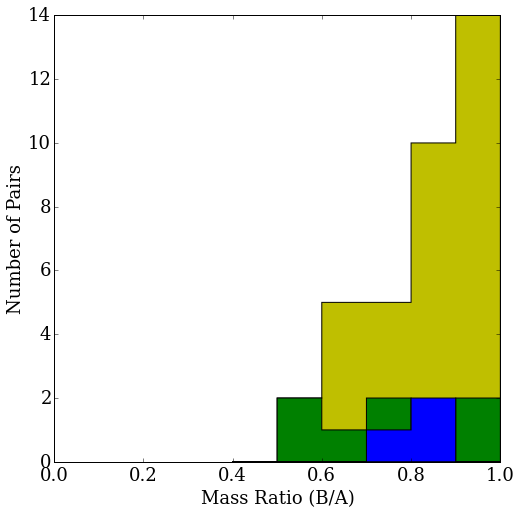

In [14]:
### Mass ratio distribution ###

plt.figure(figsize=(8,8))

_ = plt.hist((mass[m][b][Good_either][ybox])/(mass[m][a][Good_either][ybox]), bins = np.arange(.4,1.1,0.1), histtype = 'stepfilled', color = 'y', edgecolor = 'k')
_ = plt.hist((mass[m][b][Good_either][gbox])/(mass[m][a][Good_either][gbox]), bins = np.arange(.4,1.1,0.1), histtype = 'stepfilled', color = 'g', edgecolor = 'k')
_ = plt.hist((mass[m][b][Good_either][bbox])/(mass[m][a][Good_either][bbox]), bins = np.arange(.4,1.1,0.1), histtype = 'stepfilled', color = 'b', edgecolor = 'k')

plt.ylabel('Number of Pairs')
plt.xlabel('Mass Ratio (B/A)')
plt.xlim(0,1)
plt.savefig('MassHist.png',dpi=500)

### KS TEST

In [60]:
ydist = (mass[m][b][Good_either][ybox])/(mass[m][a][Good_either][ybox])
gdist = (mass[m][b][Good_either][gbox])/(mass[m][a][Good_either][gbox])
bdist = (mass[m][b][Good_either][bbox])/(mass[m][a][Good_either][bbox])

gbdist = np.concatenate((gdist,bdist))

In [65]:
## KS TEST

stats.ks_2samp(gbdist,ydist)

Ks_2sampResult(statistic=0.33888888888888885, pvalue=0.26782087011926448)

High p-value indicates we cannot reject the hypothesis that the samples are drawn from the same population.

### IDing KICs of same-mass green/blue pairs

In [40]:
np.where((mass[m][b][Good_either][gbox_b])/(mass[m][a][Good_either][gbox_b]) > 0.9)

(array([0, 1]),)

In [47]:
print((mass[m][b][Good_either][gbox_b])/(mass[m][a][Good_either][gbox_b]))
print(mass[m][a][Good_either][gbox_b][0])
print(mass[m][b][Good_either][gbox_b][0])

[ 0.95097019  0.98775179  0.5577816   0.76108634  0.6592446   0.75463712
  0.56029975]
0.6249213164
0.5942815438


In [51]:
print(m[a][Good_either][gbox_b][0])
print(m[b][Good_either][gbox_b][0])
print(m[a][Good_either][gbox_b][1])
print(m[b][Good_either][gbox_b][1])

146654
146653
141965
38561


In [52]:
print(kicnum[146654])
print(kicnum[146653])
print(kicnum[141965])
print(kicnum[38561])

7871442.0
7871438.0
7676737.0
11709022.0


In [80]:
np.where((Kep_ID == 7871442) | (Kep_ID == 7871438))
print(prot[16])
print(prot[17])

2.85
17.45


In [59]:
print(Lfl_Lbol[146654])
print(Lfl_Lbol[146653])

1.061494557e-07
0.0002858301


## Rotation Analysis - 

In [15]:
print(np.where((prot[a][Good_either] <= 0)))

(array([34]),)


In [16]:
prot = np.delete(prot,[72,114])
print(prot)

[  8.27   1.98  19.66  16.31  14.07  24.54  22.84  41.97  41.7   13.21
  25.72  34.12  24.78  36.72  31.82  21.58   2.85  17.45   8.11   7.06
   3.51  30.96  34.12   0.    48.28  39.01  20.84  28.69  12.22  38.27
  12.22   0.61  12.46   4.99  14.64  13.52  14.45  46.4   15.9   20.38
  25.43  19.3   13.77   7.33  22.58   0.    15.44  41.45  20.74  12.57
   2.2   28.25  38.84  37.84  17.41  11.42  14.66   5.5   21.78  18.18
  19.66  15.62  16.08   7.73  19.31  10.38  16.45  20.22  12.11  15.59
  38.99  48.39  24.45  27.    10.29  22.32   7.23  36.17  39.21   5.2
  18.84   4.52   0.72  43.32   6.77  19.25  24.82  29.12   1.72  39.13
  53.99  15.88  19.38  26.08   0.     3.63  27.08  10.98  25.16  35.21
  39.07  42.87  18.89   0.98   0.99  22.14  24.51  45.32  48.65   9.89
   7.2    0.79  11.22  55.17  16.33  31.37  12.27   7.62   0.    11.32
  13.82  34.04   3.86  12.77  10.38  16.28  17.97  16.43  17.25  20.53
  23.5   22.85  21.08  14.19  36.54  20.38  24.77   9.62   0.     0.     5.45


In [17]:
rosby = prot/tau[m]
print(rosby)

[ 0.50888803  0.17246794  0.68579472  0.52681341  0.90082304  0.94306092
  0.96303807  1.25872968  2.06617793  0.6503618   1.72771118  1.73774614
  1.80864069  1.80364966  0.84331398  0.72364618  0.09675563  0.63108277
  0.76056742  0.55796176  0.25122024  2.32277248  1.46537875  0.
  1.22445343  1.06147649  1.71577923  1.39479438  1.05338181  1.74586918
  1.05338181  0.06054803  0.70190318  0.41566952  1.15294115  1.17032159
  0.91560499  3.61183265  0.51746275  0.91445153  1.37485664  1.40162574
  0.70111696  0.59252231  0.73624706  0.          0.97598882  1.18691034
  1.12878019  1.06439258  0.08770137  1.83833337  1.18431202  0.73258123
  1.00538582  0.88759375  1.0007572   0.51164784  0.64805725  0.57616146
  0.67749199  0.64409728  0.7787246   0.48980115  0.9675763   0.73492583
  0.64790737  0.87836996  1.02760315  1.20739383  1.89211869  1.59518255
  1.06176865  1.88460964  0.75065323  1.42050622  0.6467497   0.82474456
  1.10378093  0.53919294  0.99435179  0.31317421  0.0281839

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


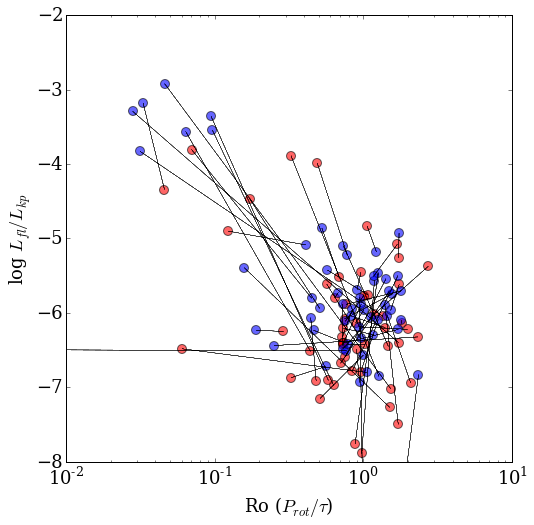

In [18]:
fig = plt.figure(figsize=(8,8))#connect these by lines

plt.scatter(rosby[a][Good_either],np.log10(Lfl_Lbol[m][a][Good_either]),alpha = 0.6,s=80,c='r')
plt.scatter(rosby[b][Good_either],np.log10(Lfl_Lbol[m][b][Good_either]),alpha = 0.6,s=80,c='b')

for j in range (np.size(Good_either[0])):
    plt.plot([rosby[a][Good_either],rosby[b][Good_either]],[np.log10(Lfl_Lbol[m][a][Good_either]),np.log10(Lfl_Lbol[m][b][Good_either])],'k',lw=0.2,alpha=0.1)

plt.xscale('log')
plt.ylim(-8,-2)
plt.xlabel(r'Ro ($P_{rot}/\tau$)')
plt.ylabel(r'log $L_{fl}/L_{kp}$')
plt.savefig('ABrot.png',dpi=500)

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


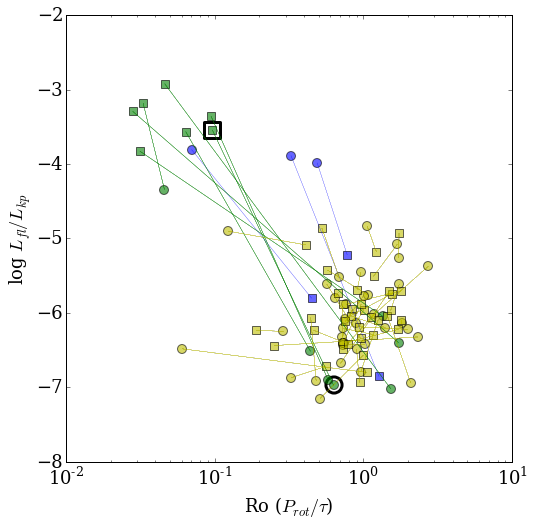

In [21]:
fig = plt.figure(figsize=(8,8))#connect these by lines

for j in range (len(bbox[0])):
    plt.plot([rosby[a][Good_either][bbox],rosby[b][Good_either][bbox]],
             [np.log10(Lfl_Lbol[m][a][Good_either][bbox]),np.log10(Lfl_Lbol[m][b][Good_either][bbox])],'b',lw=0.2,alpha=0.5)

for j in range (len(gbox[0])):
    plt.plot([rosby[a][Good_either][gbox],rosby[b][Good_either][gbox]],
             [np.log10(Lfl_Lbol[m][a][Good_either][gbox]),np.log10(Lfl_Lbol[m][b][Good_either][gbox])],'g',lw=0.2,alpha=0.5)    
  
for j in range (len(ybox[0])):
    plt.plot([rosby[a][Good_either][ybox],rosby[b][Good_either][ybox]],
             [np.log10(Lfl_Lbol[m][a][Good_either][ybox]),np.log10(Lfl_Lbol[m][b][Good_either][ybox])],'y',lw=0.2,alpha=0.1)

plt.scatter(rosby[a][Good_either][gbox][0],np.log10(Lfl_Lbol[m][a][Good_either][gbox][0]),s=260,c='white', linewidth=3)
plt.scatter(rosby[b][Good_either][gbox][0],np.log10(Lfl_Lbol[m][b][Good_either][gbox][0]),s=260,c='white', marker = 's', linewidth=3)

plt.scatter(rosby[a][Good_either][bbox],np.log10(Lfl_Lbol[m][a][Good_either][bbox]),alpha = 0.6,s=80,c='b')
plt.scatter(rosby[a][Good_either][gbox],np.log10(Lfl_Lbol[m][a][Good_either][gbox]),alpha = 0.6,s=80,c='g')
plt.scatter(rosby[a][Good_either][ybox],np.log10(Lfl_Lbol[m][a][Good_either][ybox]),alpha = 0.6,s=80,c='y')
plt.scatter(rosby[b][Good_either][bbox],np.log10(Lfl_Lbol[m][b][Good_either][bbox]),alpha = 0.6,s=80,c='b',marker='s')
plt.scatter(rosby[b][Good_either][gbox],np.log10(Lfl_Lbol[m][b][Good_either][gbox]),alpha = 0.6,s=80,c='g',marker='s')
plt.scatter(rosby[b][Good_either][ybox],np.log10(Lfl_Lbol[m][b][Good_either][ybox]),alpha = 0.6,s=80,c='y',marker='s')


plt.xscale('log')
plt.xlim(1e-2,1e1)
plt.xlabel(r'Ro ($P_{rot}/\tau$)')
plt.ylabel(r'log $L_{fl}/L_{kp}$')
plt.savefig('GBYrot.png',dpi=500)

## Separation Distributions

In [28]:
# cross matched using CDS XMatch Service of:
# Gaia DR1 TGAS and KIC
file = '1497471274965A.csv'

In [29]:
gaia = pd.read_csv(file)
gaia.columns

Index(['angDist', 'ra_ep2000', 'dec_ep2000', 'errHalfMaj', 'errHalfMin',
       'errPosAng', 'ra', 'dec', 'hip', 'tycho2_id', 'solution_id',
       'source_id', 'random_index', 'ref_epoch', 'ra_error', 'dec_error',
       'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac',
       'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac',
       'astrometric_delta_q', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_primary_flag',
       'astrometric_relegation_factor', 'astrometric_weight_al',
       'astrometric_weight_ac', 'astrometric_priors_used',
       'matched_observations', 'duplicated_source',
       's

In [30]:
jfile = 'Janes2017_data.txt'

janes = pd.read_table(jfile, delim_whitespace=True, comment='#',
                      names=('Bid', 'KIC', 'pm_ra', 'pme_ra', 'pm_de', 'pme_de', 
                             'Sep','Irp', 'gmag', 'g_Ks', 'per','e_per','V','e_V', 'NQtrs', 'flag'))

In [31]:
janes.shape

(186, 16)

In [32]:
big_table = pd.merge(janes, gaia, how='inner', left_on='KIC', right_on=u'KIC')
big_table.shape

(55, 99)

In [33]:
gaia_dist = np.zeros(len(janes)) - 1

for i in range(len(janes)):
    x = np.where((gaia[u'KIC'] == janes['KIC'].values[i]))[0]
    if len(x) > 0:
         gaia_dist[i] = 1000./ gaia[u'parallax'].values[x]

In [36]:
psep1 = gaia_dist*sep

In [37]:
sep = np.delete(sep,[72,114])

In [39]:
psep2 = jim_dist[m]*sep

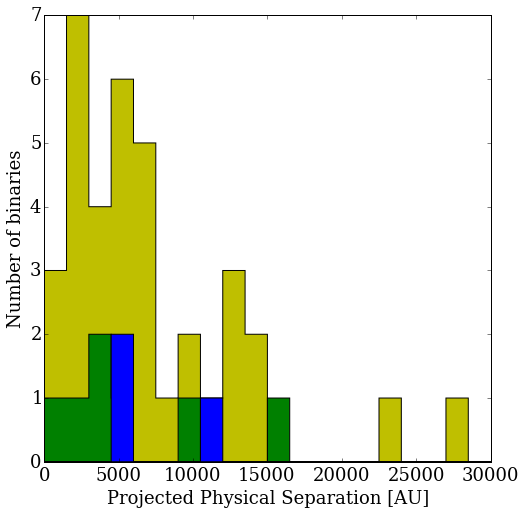

In [43]:
fig = plt.figure(figsize = (8,8))

plt.hist(psep2[a][Good_either][ybox],bins=20,range=(0,30000),histtype='stepfilled',color='y',edgecolor='k')
plt.hist(psep2[a][Good_either][gbox],bins=20,range=(0,30000),histtype='stepfilled',color='g',edgecolor='k')
plt.hist(psep2[a][Good_either][bbox],bins=20,range=(0,30000),histtype='stepfilled',color='b',edgecolor='k')

plt.xlabel('Projected Physical Separation [AU]')
plt.ylabel('Number of binaries')

plt.savefig('sephist.png', dpi=300)

## Light Curves for Targets of Interest - 

In [44]:
from astropy.io import fits

In [114]:
target_1b = fits.open('kplr007871438-2009166043257_llc.fits')
target_1a = fits.open('kplr007871442-2009166043257_llc.fits')
target_2a = fits.open('kplr010536761-2009166043257_llc.fits')
target_2b = fits.open('kplr008888573-2009259160929_llc.fits')

In [100]:
target_1a.info()

Filename: kplr007871442-2009166043257_llc.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      58   ()              
1    LIGHTCURVE  BinTableHDU    155   1639R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
2    APERTURE    ImageHDU        48   (6, 5)       int32   


In [101]:
target_1b.info()

Filename: kplr007871438-2009166043257_llc.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      58   ()              
1    LIGHTCURVE  BinTableHDU    155   1639R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
2    APERTURE    ImageHDU        48   (6, 6)       int32   


In [110]:
target_1a[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-01'         / file creation date.                            
CREATOR = '796113 FluxExporter2PipelineModule' / pipeline job and program used t
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.22 r60269' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [113]:
target_1b[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-01'         / file creation date.                            
CREATOR = '796113 FluxExporter2PipelineModule' / pipeline job and program used t
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.22 r60269' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [68]:
cols = target_1a[1].columns

In [70]:
cols.info()

name:
    ['TIME', 'TIMECORR', 'CADENCENO', 'SAP_FLUX', 'SAP_FLUX_ERR', 'SAP_BKG', 'SAP_BKG_ERR', 'PDCSAP_FLUX', 'PDCSAP_FLUX_ERR', 'SAP_QUALITY', 'PSF_CENTR1', 'PSF_CENTR1_ERR', 'PSF_CENTR2', 'PSF_CENTR2_ERR', 'MOM_CENTR1', 'MOM_CENTR1_ERR', 'MOM_CENTR2', 'MOM_CENTR2_ERR', 'POS_CORR1', 'POS_CORR2']
format:
    ['D', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'D', 'E', 'D', 'E', 'D', 'E', 'D', 'E', 'E', 'E']
unit:
    ['BJD - 2454833', 'd', '', 'e-/s', 'e-/s', 'e-/s', 'e-/s', 'e-/s', 'e-/s', '', 'pixel', 'pixel', 'pixel', 'pixel', 'pixel', 'pixel', 'pixel', 'pixel', 'pixels', 'pixels']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['D14.7', 'E13.6', 'I10', 'E14.7', 'E14.7', 'E14.7', 'E14.7', 'E14.7', 'E14.7', 'B16.16', 'F10.5', 'E14.7', 'F10.5', 'E

In [115]:
k1a_data = target_1a[1].data
k1b_data = target_1b[1].data
k2a_data = target_2a[1].data
k2b_data = target_2b[1].data

In [116]:
time_1a = k1a_data['TIME'] 
flux_1a = k1a_data['PDCSAP_FLUX'] 
err_1a = k1a_data['PDCSAP_FLUX_ERR']

time_1b = k1b_data['TIME'] 
flux_1b = k1b_data['PDCSAP_FLUX'] 
err_1b = k1b_data['PDCSAP_FLUX_ERR']

time_2a = k2a_data['TIME'] 
flux_2a = k2a_data['PDCSAP_FLUX'] 
err_2a = k2a_data['PDCSAP_FLUX_ERR']

time_2b = k2b_data['TIME'] 
flux_2b = k2b_data['PDCSAP_FLUX'] 
err_2b = k2b_data['PDCSAP_FLUX_ERR']

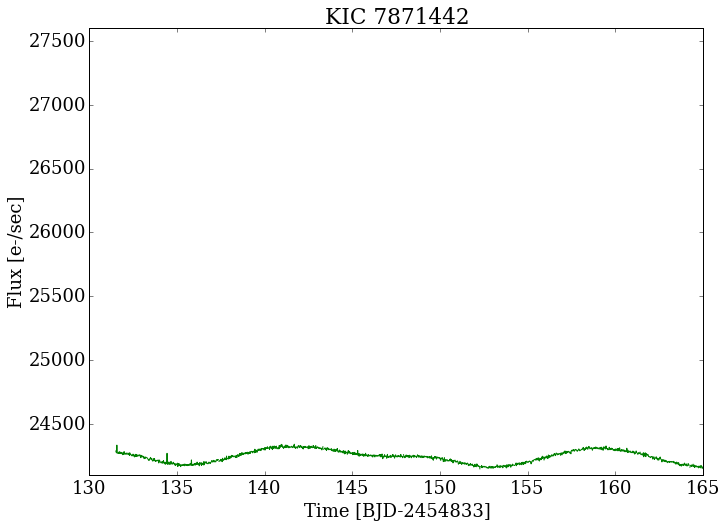

In [117]:
fig = plt.figure(figsize = (11,8))

plt.plot(time_1a,flux_1a,color='g')
#plt.errorbar(time,flux,yerr=err,color='g',linestyle="None")
plt.ylim(24100,27600)
plt.xlabel('Time [BJD-2454833]')
plt.ylabel('Flux [e-/sec]')
plt.title('KIC 7871442')

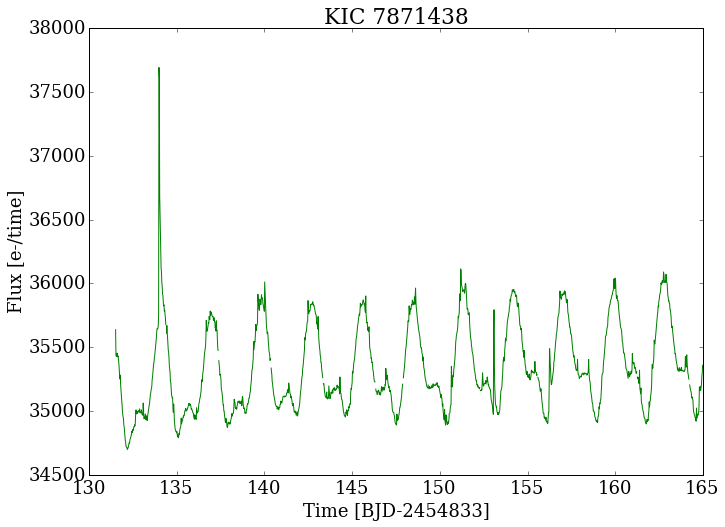

In [108]:
fig = plt.figure(figsize = (11,8))

plt.plot(time_1b,flux_1b,color='g')
#plt.errorbar(time,flux,yerr=err,color='g',linestyle="None")
plt.xlabel('Time [BJD-2454833]')
plt.ylabel('Flux [e-/sec]')
plt.title('KIC 7871438')

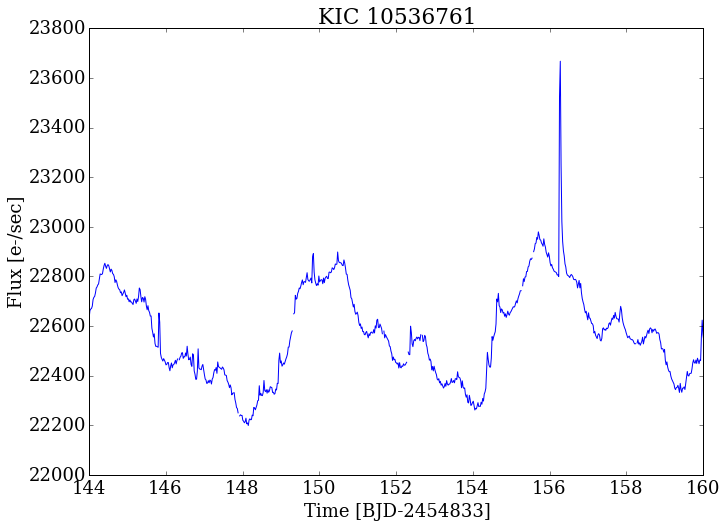

In [125]:
fig = plt.figure(figsize = (11,8))

plt.plot(time_2a,flux_2a,color='b')
#plt.errorbar(time,flux,yerr=err,color='g',linestyle="None")
plt.xlim(144,160)
plt.xlabel('Time [BJD-2454833]')
plt.ylabel('Flux [e-/sec]')
plt.title('KIC 10536761')

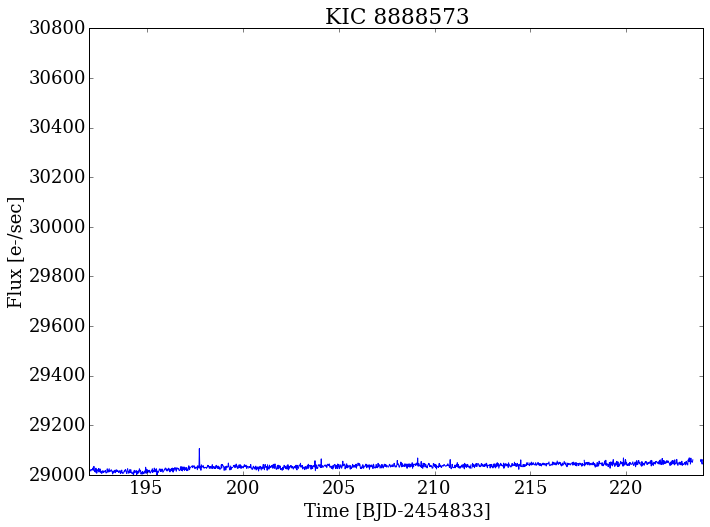

In [124]:
fig = plt.figure(figsize = (11,8))

plt.plot(time_2b,flux_2b,color='b')
#plt.errorbar(time,flux,yerr=err,color='g',linestyle="None")
plt.ylim(29000,30800)
plt.xlim(192,224)
plt.xlabel('Time [BJD-2454833]')
plt.ylabel('Flux [e-/sec]')
plt.title('KIC 8888573')